In [1]:
#loading the libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
import seaborn as sns
from tkinter import *
from tkinter import messagebox
import urllib
import urllib.request

In [2]:
#loading the dataset
df = pd.read_csv('/content/dataset symptoms.csv')
print(df.head())

            Disease   Symptom_1              Symptom_2              Symptom_3  \
0  Fungal infection     itching              skin_rash   nodal_skin_eruptions   
1  Fungal infection   skin_rash   nodal_skin_eruptions    dischromic _patches   
2  Fungal infection     itching   nodal_skin_eruptions    dischromic _patches   
3  Fungal infection     itching              skin_rash    dischromic _patches   
4  Fungal infection     itching              skin_rash   nodal_skin_eruptions   

              Symptom_4 Symptom_5 Symptom_6 Symptom_7 Symptom_8 Symptom_9  \
0   dischromic _patches       NaN       NaN       NaN       NaN       NaN   
1                   NaN       NaN       NaN       NaN       NaN       NaN   
2                   NaN       NaN       NaN       NaN       NaN       NaN   
3                   NaN       NaN       NaN       NaN       NaN       NaN   
4                   NaN       NaN       NaN       NaN       NaN       NaN   

  Symptom_10 Symptom_11 Symptom_12 Symptom_13 Symp

In [3]:
df1 = pd.read_csv('/content/Symptom-severity.csv')
print(df1.head())

                Symptom  weight
0               itching       1
1             skin_rash       3
2  nodal_skin_eruptions       4
3   continuous_sneezing       4
4             shivering       5


In [4]:
df.isna().sum()
df.isnull().sum()

cols = df.columns
data = df[cols].values.flatten()

s = pd.Series(data)
s = s.str.strip()
s = s.values.reshape(df.shape)

df = pd.DataFrame(s, columns=df.columns)

df = df.fillna(0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,itching,skin_rash,dischromic _patches,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,0,0,0,0,0,0,0,0,0,0,0


In [5]:
vals = df.values
symptoms = df1['Symptom'].unique()

for i in range(len(symptoms)):
    vals[vals == symptoms[i]] = df1[df1['Symptom'] == symptoms[i]]['weight'].values[0]

d = pd.DataFrame(vals, columns=cols)

d = d.replace('dischromic _patches', 0)
d = d.replace('spotting_ urination',0)
df = d.replace('foul_smell_of urine',0)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14
0,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,3,4,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,4,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,3,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0


In [6]:
!pip install pycaret &> /dev/null

In [8]:
from pycaret.utils import version
from pycaret.datasets import get_data
from pycaret.classification import *
s1=setup(data=df)


,Description,Value
0,Session id,6099
1,Target,Symptom_14
2,Target type,Multiclass
3,Target mapping,"0: 0, 3: 1, 5: 2, 7: 3"
4,Original data shape,"(4920, 15)"
5,Transformed data shape,"(4920, 15)"
6,Transformed train set shape,"(3444, 15)"
7,Transformed test set shape,"(1476, 15)"
8,Numeric features,13
9,Categorical features,1


In [9]:
cm = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9988,0.9994,0.9988,0.9991,0.9989,0.9904,0.9906,0.2140
dt,Decision Tree Classifier,0.9988,0.9999,0.9988,0.9991,0.9989,0.9904,0.9906,0.1420
rf,Random Forest Classifier,0.9988,0.9999,0.9988,0.9991,0.9989,0.9904,0.9906,0.6330
gbc,Gradient Boosting Classifier,0.9988,0.9999,0.9988,0.9991,0.9989,0.9904,0.9906,1.6370
et,Extra Trees Classifier,0.9988,0.9999,0.9988,0.9991,0.9989,0.9904,0.9906,0.4400
xgboost,Extreme Gradient Boosting,0.9988,0.9999,0.9988,0.9991,0.9989,0.9904,0.9906,0.3740
lightgbm,Light Gradient Boosting Machine,0.9988,0.9999,0.9988,0.9991,0.9989,0.9904,0.9906,1.1550
lr,Logistic Regression,0.9974,0.9999,0.9974,0.9981,0.9976,0.9786,0.9790,3.0010
nb,Naive Bayes,0.9954,0.9999,0.9954,0.9963,0.9952,0.9614,0.9617,0.1460
svm,SVM - Linear Kernel,0.9901,0.0000,0.9901,0.9886,0.9885,0.9086,0.9135,0.1970


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('  ').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
(df[cols] == 0).all()

df['Disease'].value_counts()

df['Disease'].unique()

data = df.iloc[:,1:].values
labels = df['Disease'].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, shuffle=True, train_size = 0.85)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(4182, 14) (738, 14) (4182,) (738,)


In [12]:
model = SVC()
model.fit(x_train, y_train)

preds = model.predict(x_test)
print(preds)

['Alcoholic hepatitis' 'hepatitis A' 'Diabetes' 'Fungal infection'
 'Arthritis' 'Jaundice' 'Acne' 'Drug Reaction'
 'Paralysis (brain hemorrhage)' 'Hypertension' 'Alcoholic hepatitis'
 'Dengue' 'GERD' 'Hypertension' '(vertigo) Paroymsal  Positional Vertigo'
 'Hepatitis E' 'Hyperthyroidism' 'Acne' 'Gastroenteritis' 'Psoriasis'
 'Common Cold' 'Typhoid' 'AIDS' 'Osteoarthristis'
 '(vertigo) Paroymsal  Positional Vertigo' 'Hepatitis D' 'Acne' 'AIDS'
 'Urinary tract infection' 'Chicken pox' 'Psoriasis' 'Hypertension'
 'Alcoholic hepatitis' 'Pneumonia' 'AIDS' 'GERD' 'Migraine' 'Dengue'
 'Jaundice' 'Hypoglycemia' 'Paralysis (brain hemorrhage)'
 'Osteoarthristis' 'Chicken pox' 'GERD' 'Varicose veins'
 'Fungal infection' 'Dengue' 'Heart attack' 'Dimorphic hemmorhoids(piles)'
 'Arthritis' 'Hypoglycemia' 'GERD' 'Alcoholic hepatitis' 'Hepatitis E'
 'Hepatitis B' 'Hepatitis E' 'Hyperthyroidism' 'Diabetes' 'Heart attack'
 'Hepatitis B' 'Malaria' 'Paralysis (brain hemorrhage)' 'Acne' 'Impetigo'
 'Hepat

F1-score% = 94.1819519615844 | Accuracy% = 94.3089430894309


<Axes: >

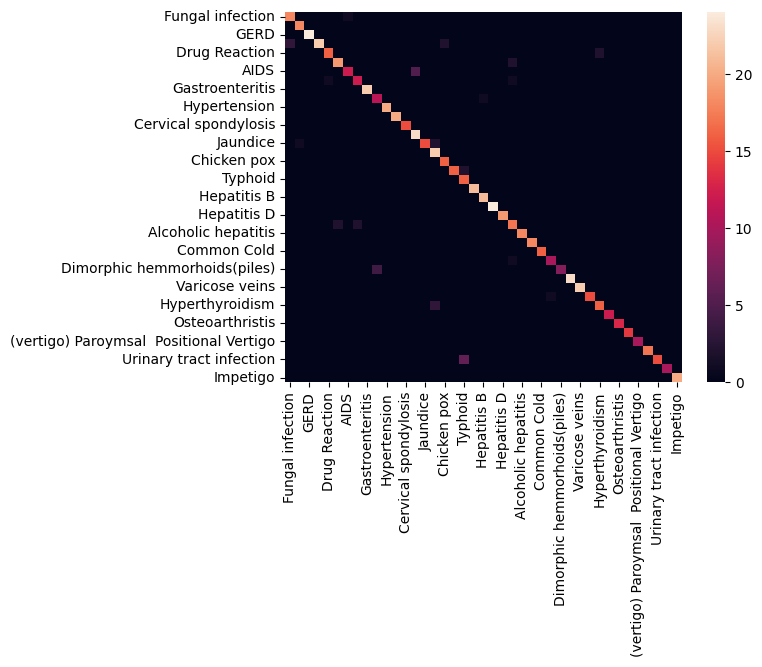

In [13]:
conf_mat = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(conf_mat, index=df['Disease'].unique(), columns=df['Disease'].unique())
print('F1-score% =', f1_score(y_test, preds, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, preds)*100)
sns.heatmap(df_cm)

In [14]:
def message():
    if (Symptom1.get() == "None" and  Symptom2.get() == "None" and Symptom3.get() == "None" and Symptom4.get() == "None" and Symptom5.get() == "None"):
        messagebox.showinfo("OPPS!!", "ENTER  SYMPTOMS PLEASE")
    else :
        dt()

def dt():
    psymptoms = [Symptom1.get(),Symptom2.get(),Symptom3.get(),Symptom4.get(),Symptom5.get()]
    loc = location.get()
    a = np.array(df1["Symptom"])
    b = np.array(df1["weight"])
    for j in range(len(psymptoms)):
        for k in range(len(a)):
            if psymptoms[j]==a[k]:
                psymptoms[j]=b[k]

    nulls = [0,0,0,0,0,0,0,0,0,0,0,0]
    psy = [psymptoms + nulls]

    pred2 = model.predict(psy)
    t3.delete("1.0", END)
    t3.insert(END, pred2[0])

    if(pred2[0]=="GERD"):
        z=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=1&field2=0&field3='+str(loc))
        z.read()
    if(pred2[0]=="Hepatitis C"):
        r=urllib.request.urlopen('https://api.thingspeak.com/update?api_key=MP77HD9B13Z7N6BO&field1=0&field2=1&field3='+str(loc))
        r.read()

In [15]:
# intalling streamlit
!pip install Streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.1 MB/s eta 0:00:00


In [16]:
import streamlit as st
import pandas as pd

# Define symptom options
symptom_options = ["fatigue", "yellowish_skin", "loss_of_appetite",
                   "yellowing_of_eyes", "family_history", "stomach_pain",
                   "ulcers_on_tongue", "vomiting", "cough", "chest_pain"]

# Define location options
location_options = ["New Delhi", "Mumbai", "Chennai", "Kolkata", "Bengaluru"]

# Create the Streamlit app
st.title("Disease Prediction From Symptoms")

# Collect user input for symptoms
st.subheader("Select your symptoms:")
symptom1 = st.selectbox("Symptom 1:", symptom_options)
symptom2 = st.selectbox("Symptom 2:", symptom_options)
symptom3 = st.selectbox("Symptom 3:", symptom_options)
symptom4 = st.selectbox("Symptom 4:", symptom_options)
symptom5 = st.selectbox("Symptom 5:", symptom_options)

# Collect user input for location
st.subheader("Select your location:")
location = st.selectbox("Location:", location_options)

# Display a button to trigger the prediction
if st.button("Predict"):
    # Create a pandas DataFrame from the selected symptoms and location
    symptoms_data = pd.DataFrame({
        "Symptom 1": [symptom1],
        "Symptom 2": [symptom2],
        "Symptom 3": [symptom3],
        "Symptom 4": [symptom4],
        "Symptom 5": [symptom5],
        "Location": [location]
    })

    # Load the prediction model (assuming it's saved as a pickle file)
    import pickle
    with open('prediction_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # Predict the disease based on the symptoms and location
    predicted_disease = model.predict(symptoms_data)[0]

    # Display the predicted disease
    st.success("Predicted Disease: {}".format(predicted_disease))

2023-11-20 11:59:13.394 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
